# Gauss-Otsu-labeling
This workflow for image segmentation is a very simple approach, e.g. for detecting and segmenting nuclei in fluorescence micropscopy images. A nuclei marker such as nuclei-GFP, DAPI or histone-RFP in combination with various microscopy techniques can be used to generate images of suitable kind. This workflow will work if the objects are not too dense.

To demonstrate the workflow, we're using image data from the [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC022):
We used image set BBBC022v1 [Gustafsdottir et al., PLOS ONE, 2013](http://dx.doi.org/10.1371/journal.pone.0080999), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

We start by opening an example image.

In [2]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

input_image = imread("BBBC022/IXMtest_A02_s9.tif")[:,:,0]

# define an interesting sub-region
bb_x=200
bb_y=0
bb_width=200
bb_height=200

Next, we initialize the GPU

In [3]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

For visualisation purposes we crop out a sub-region:

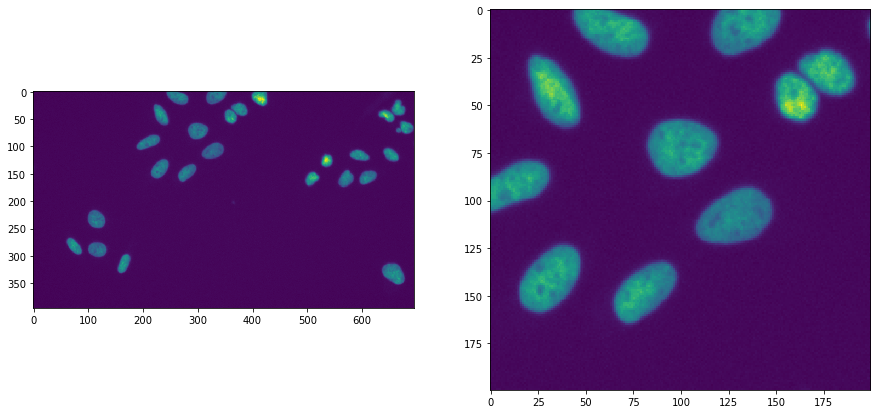

In [5]:
input_crop = cle.crop(input_image, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(input_image, plot=axs[0])
cle.imshow(input_crop, plot=axs[1])

## Applying the algorithm
Gauss-Otsu-labeling is a command in clesperanto, which asks for a sigma parameter. It controls how precise segmented objects are outlined (`outline_sigma`).

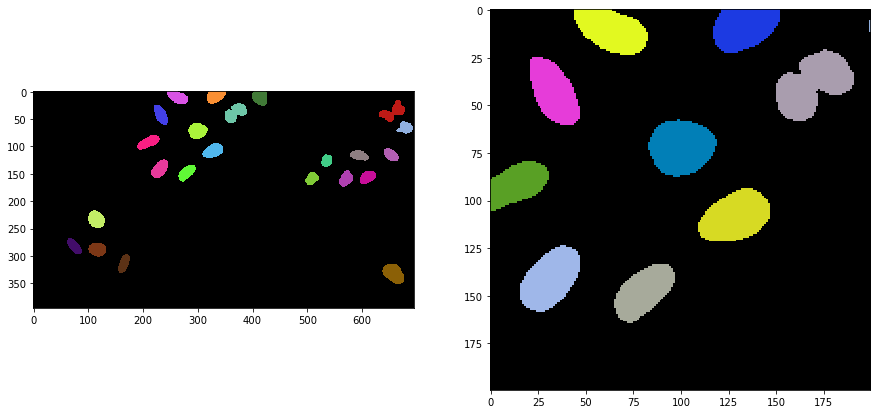

In [6]:
sigma_outline = 1

segmented = cle.gauss_otsu_labeling(input_image, outline_sigma=sigma_outline)
segmented_crop = cle.crop(segmented, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

As you can see, if objects are too close, they will be segmented together. In these cases it is recommended to try [Voronoi-Otsu-Labeling](https://github.com/clEsperanto/pyclesperanto_prototype/blob/master/demo/segmentation/voronoi_otsu_labeling.ipynb).